In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

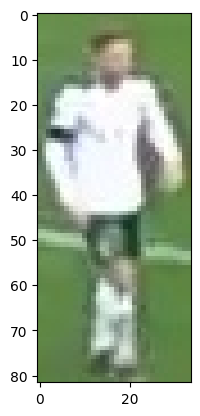

In [4]:
plt.imshow(image)
plt.show()

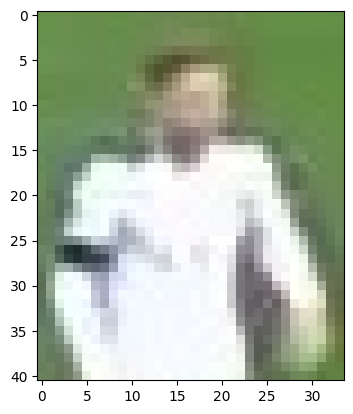

In [7]:
top_half = image[0 : int(image.shape[0]/2), :]
plt.imshow(top_half)
plt.show()

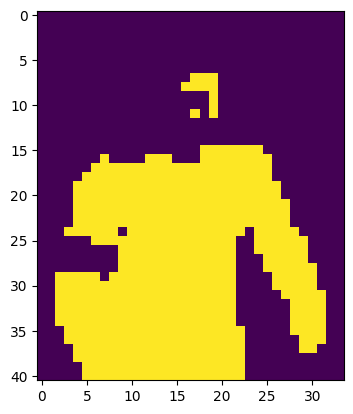

In [10]:
image_2d = top_half.reshape(-1, 3)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(image_2d)

labels = kmeans.labels_
centers = kmeans.cluster_centers_

clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])

plt.imshow(clustered_image)
plt.show()

In [11]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key = corner_clusters.count)
print(non_player_cluster)

0


In [12]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [13]:
kmeans.cluster_centers_[player_cluster]

array([234.80892857, 238.50178571, 238.32142857])